In [5]:
# Import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [17]:
# Import the combined data
combined_df = pd.read_csv('/content/combined_admissions_characteristics.csv', low_memory=False)
display(combined_df.head(2))

,UNITID,ADMCON1,ADMCON2,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,...,C18ENPRF,C18SZSET,C21BASIC,C21IPUG,C21IPGRD,C21UGPRF,C21ENPRF,C21SZSET,UEIS,ï»¿UNITID
0,100654,1,2,1,2,3,2,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,1,3,1,1,3,3,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Import the HD2023 data
hd2023_df = pd.read_csv('/content/HD2023.csv', low_memory=False)
display(hd2023_df.head(2))

,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,CBSA,CBSATYPE,CSA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,Dr. Daniel K. Wims,...,26620,1,290,1089,Madison County,105,-86.568502,34.783368,106,1
1,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,13820,1,142,1073,Jefferson County,107,-86.799345,33.505697,91,1


In [20]:
# Merge all_data with hd2023_df on UNITID and select the CONTROL column
merged_df = pd.merge(all_data, hd2023_df[['UNITID', 'CONTROL']], on='UNITID', how='inner')

# Map the numerical CONTROL values to descriptive labels
control_map = {
    1: 'Public',
    2: 'Private not-for-profit',
    3: 'Private for-profit'
}
merged_df['CONTROL'] = merged_df['CONTROL'].map(control_map)

display(merged_df.head(2))

,UNITID,ADMCON1,ADMCON2,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,...,SATMT50,XACTCM50,ACTCM50,XACTEN50,ACTEN50,XACTMT50,ACTMT50,ACTMT75,year,CONTROL
0,100654,1,2,1,2,3,2,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,Public
1,100663,1,3,1,1,3,3,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,Public


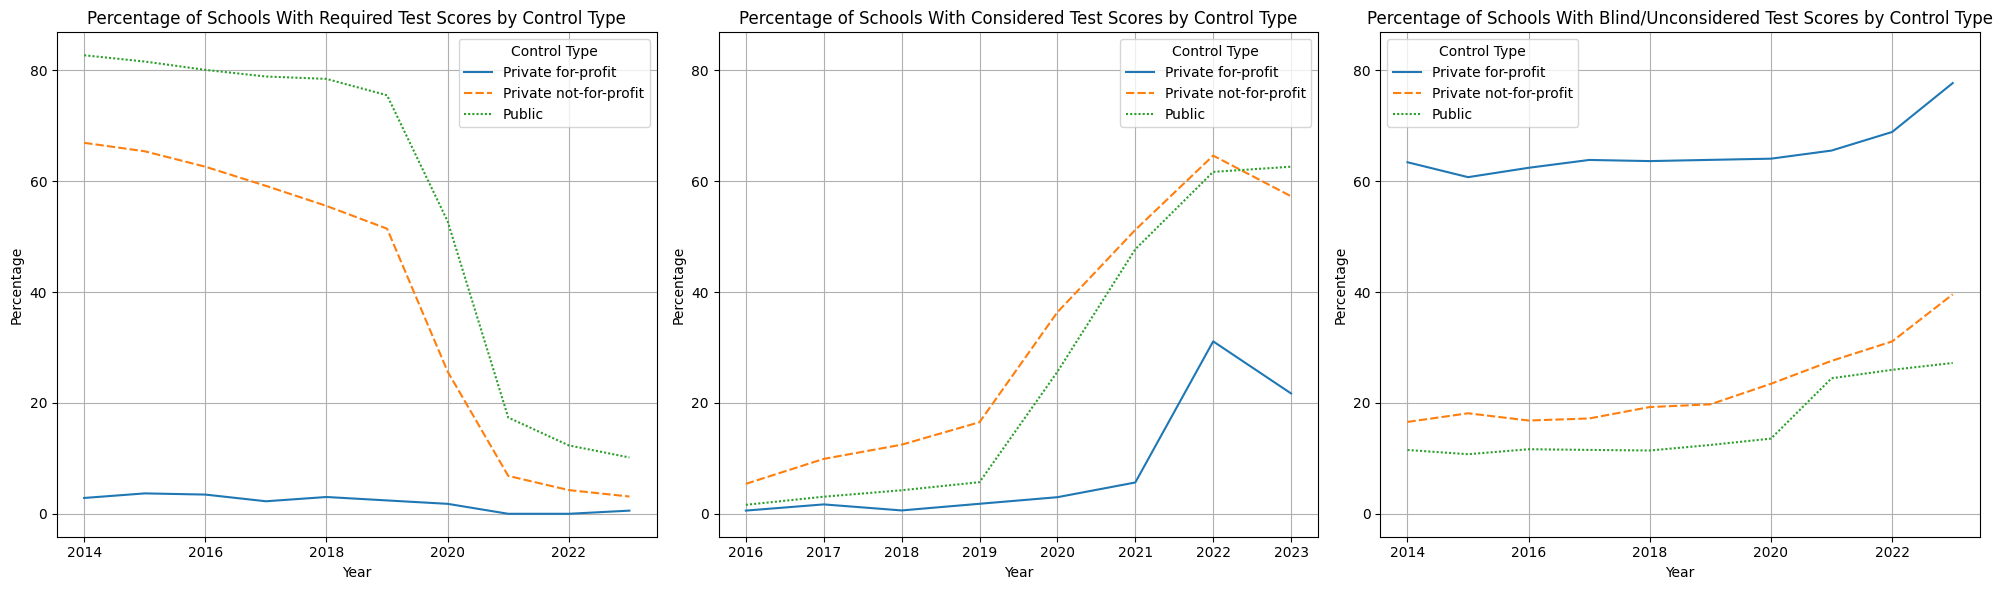

In [28]:
# Define the ADMCON7 values of interest
admcon7_values = {
    1: 'Required',
    5: 'Considered',
    3: 'Blind/Unconsidered'
}

# Create a plot for each ADMCON7 value
plt.figure(figsize=(20, 6)) # Adjusted figure size for horizontal layout

# Get the first axes object to share the y-axis with
ax0 = None

for i, (value, label) in enumerate(admcon7_values.items()):
    if i == 0:
        ax0 = plt.subplot(1, 3, i + 1) # Create the first subplot
    else:
        plt.subplot(1, 3, i + 1, sharey=ax0) # Create subsequent subplots and share the y-axis with the first one

    # Filter data for the current ADMCON7 value
    filtered_df = merged_df[merged_df['ADMCON7'] == value]

    # Calculate the percentage of the current ADMCON7 value by year and CONTROL
    percentage_df = filtered_df.groupby(['year', 'CONTROL']).size().unstack(fill_value=0)
    total_counts = merged_df.groupby(['year', 'CONTROL']).size().unstack(fill_value=0)
    percentage_df = (percentage_df / total_counts) * 100

    # Plot the percentages
    sns.lineplot(data=percentage_df, ax=plt.gca()) # Plot on the current axes
    plt.title(f'Percentage of Schools With {label} Test Scores by Control Type')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.legend(title='Control Type')

plt.tight_layout()
plt.show()